In [1]:
import scanpy as sc
import singleCellHaystack as hs
import numpy as np

In [2]:
adata=sc.datasets.pbmc3k_processed()

In [3]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [4]:
adata_raw=adata.raw.to_adata()
adata_raw

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    obsp: 'distances', 'connectivities'

In [5]:
res=hs.haystack(adata_raw, basis="umap")

> starting haystack ...
> scaling coordinates ...
> converting to dense array ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|███████████████████████████████████| 13713/13713 [00:08<00:00, 1670.46it/s]


> calculating feature means ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.17it/s]


> calculating P values ...
> done.


In [6]:
exprs=adata_raw.X

In [7]:
exprs

<2638x13714 sparse matrix of type '<class 'numpy.float32'>'
	with 2238732 stored elements in Compressed Sparse Row format>

In [8]:
coord=adata_raw.obsm["X_umap"]
coord

array([[ 1.35285574,  2.26612719],
       [-0.47802448,  7.87730423],
       [ 2.16588875, -0.24481226],
       ...,
       [ 0.34670979,  8.34967798],
       [ 0.19864146,  9.56698797],
       [ 2.62803322,  0.36722543]])

In [9]:
res2=hs.haystack_sparse(exprs, coord)

> entering sparse method ...
> scaling coordinates ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|███████████████████████████████████| 13713/13713 [00:02<00:00, 4573.74it/s]


> calculating feature means ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 28.57it/s]


> calculating P values ...
> done.


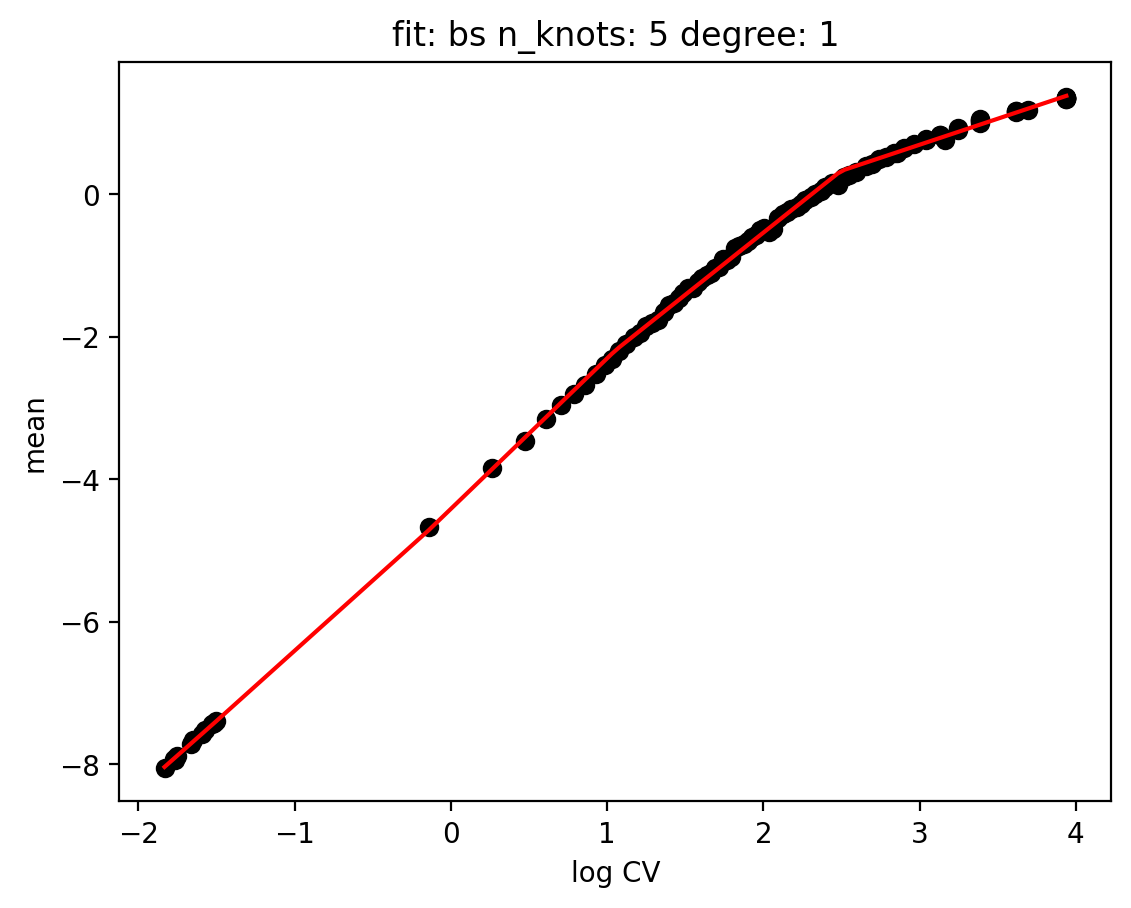

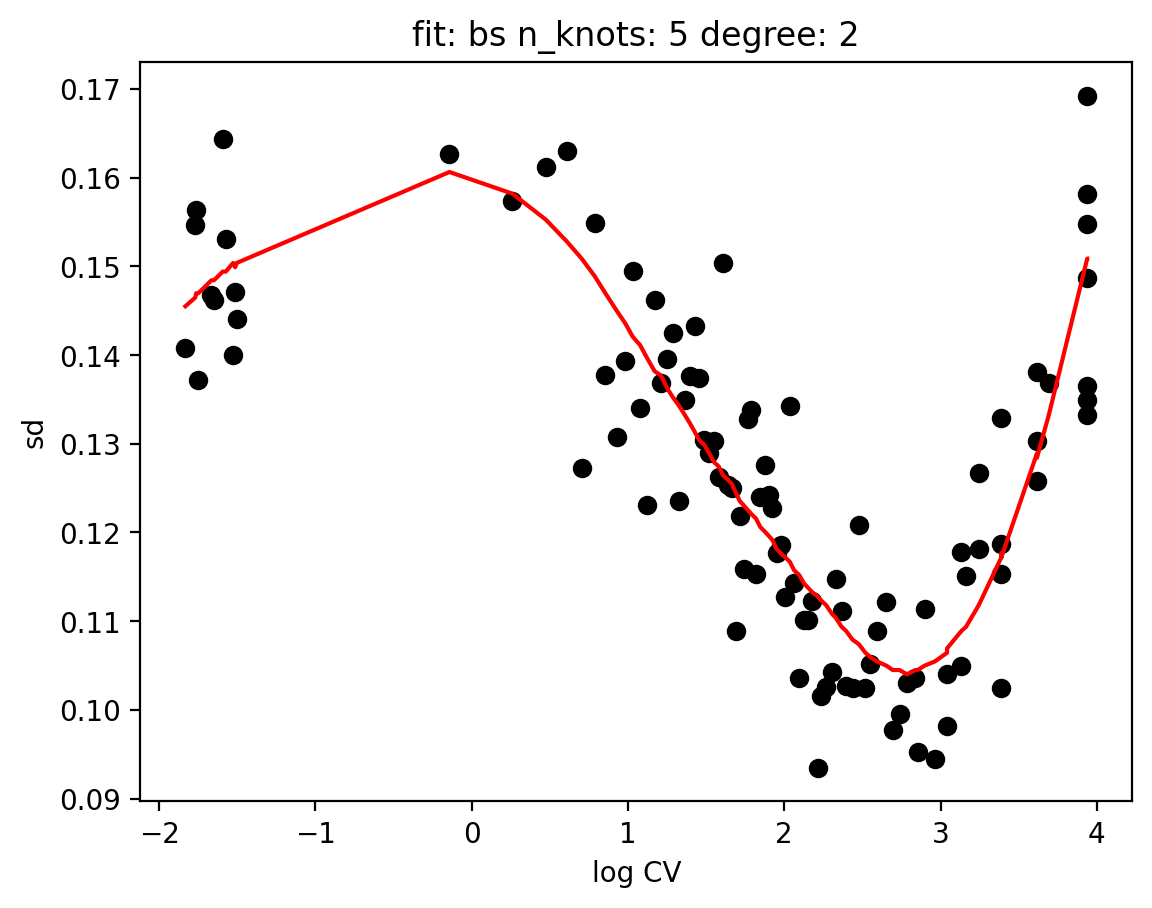

In [10]:
hs.plot_rand_fit(res, "mean")
hs.plot_rand_fit(res, "sd")

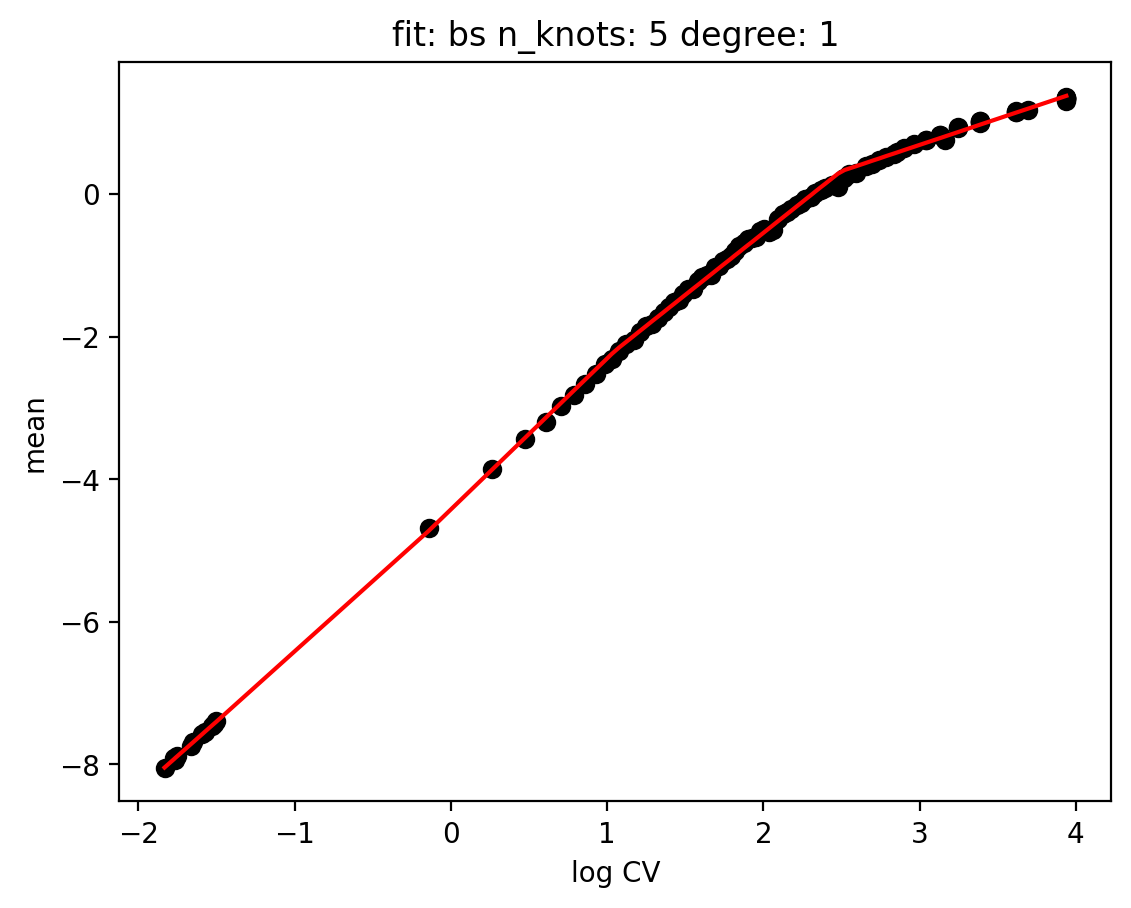

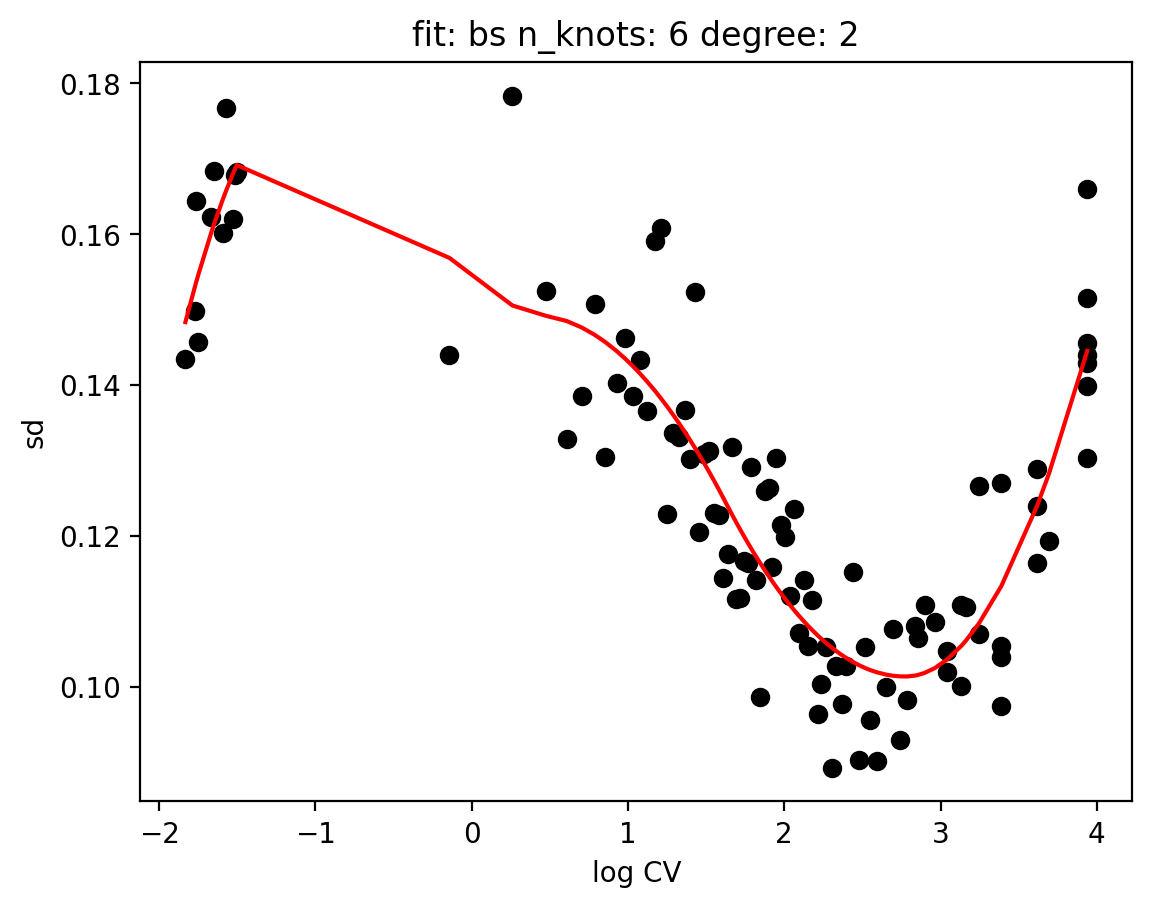

In [11]:
hs.plot_rand_fit(res2, "mean")
hs.plot_rand_fit(res2, "sd")

In [12]:
res["results"]

,gene,KLD,pval,pval_adj,logpval,logpval_adj
12672,TYROBP,0.872289,3.790915e-48,8.823794e-106,-109.191477,-105.054345
7854,MALAT1,0.009755,1.611428e-46,4.958369e-102,-105.441794,-101.304661
11877,CST3,0.853479,2.999646e-45,4.161957e-99,-102.517835,-98.380702
1049,FCER1G,0.899925,3.552792e-45,6.145216e-99,-102.348595,-98.211463
4409,HLA-DRA,0.513203,4.584540e-45,1.105333e-98,-102.093639,-97.956507
...,...,...,...,...,...,...
5016,GARS,0.263063,7.333491e-01,1.000000e+01,-0.310133,1.000000
5018,LSM5,0.153015,3.794833e-01,1.000000e+01,-0.968945,1.000000
5019,AVL9,0.573135,1.686051e+00,1.000000e+01,0.522389,1.000000
4993,AC004540.5,2.779389,1.651399e+00,1.000000e+01,0.501623,1.000000


In [13]:
res2["results"]

,KLD,pval,pval_adj,logpval,logpval_adj
12672,0.836941,5.712905e-52,1.397769e-114,-117.991697,-113.854565
4409,0.515025,1.820267e-49,8.117940e-109,-112.227687,-108.090554
11877,0.837879,4.596052e-49,6.849528e-108,-111.301472,-107.164339
4411,0.597789,8.513960e-48,5.685324e-105,-108.382377,-104.245245
1049,0.851652,1.907915e-47,3.644551e-104,-107.575488,-103.438356
...,...,...,...,...,...
5027,1.877922,1.521491e+00,1.000000e+01,0.419690,1.000000
5029,0.719066,5.306435e-02,1.000000e+01,-2.936250,1.000000
5031,0.193536,1.498655e+00,1.000000e+01,0.404568,1.000000
5061,0.315580,5.900793e-01,1.000000e+01,-0.527498,1.000000


In [32]:
sum1 = res["results"]
sum1

,gene,KLD,pval,pval_adj,logpval,logpval_adj
12672,TYROBP,0.872289,3.790915e-48,8.823794e-106,-109.191477,-105.054345
7854,MALAT1,0.009755,1.611428e-46,4.958369e-102,-105.441794,-101.304661
11877,CST3,0.853479,2.999646e-45,4.161957e-99,-102.517835,-98.380702
1049,FCER1G,0.899925,3.552792e-45,6.145216e-99,-102.348595,-98.211463
4409,HLA-DRA,0.513203,4.584540e-45,1.105333e-98,-102.093639,-97.956507
...,...,...,...,...,...,...
5016,GARS,0.263063,7.333491e-01,1.000000e+01,-0.310133,1.000000
5018,LSM5,0.153015,3.794833e-01,1.000000e+01,-0.968945,1.000000
5019,AVL9,0.573135,1.686051e+00,1.000000e+01,0.522389,1.000000
4993,AC004540.5,2.779389,1.651399e+00,1.000000e+01,0.501623,1.000000


In [33]:
sum1.index

Int64Index([12672,  7854, 11877,  1049,  4409,   907, 12942,  4411,   912,
              909,
            ...
             5011,  5012,  5013,  5014,  5015,  5016,  5018,  5019,  4993,
             6856],
           dtype='int64', length=13713)

In [40]:
sum2 = res2["results"]
sum2

,KLD,pval,pval_adj,logpval,logpval_adj
12672,0.836941,5.712905e-52,1.397769e-114,-117.991697,-113.854565
4409,0.515025,1.820267e-49,8.117940e-109,-112.227687,-108.090554
11877,0.837879,4.596052e-49,6.849528e-108,-111.301472,-107.164339
4411,0.597789,8.513960e-48,5.685324e-105,-108.382377,-104.245245
1049,0.851652,1.907915e-47,3.644551e-104,-107.575488,-103.438356
...,...,...,...,...,...
5027,1.877922,1.521491e+00,1.000000e+01,0.419690,1.000000
5029,0.719066,5.306435e-02,1.000000e+01,-2.936250,1.000000
5031,0.193536,1.498655e+00,1.000000e+01,0.404568,1.000000
5061,0.315580,5.900793e-01,1.000000e+01,-0.527498,1.000000


In [35]:
import pandas as pd

In [77]:
r1 = pd.DataFrame({
  "gene1": sum1.index, 
  "rank1": list(range(sum1.index.shape[0])),
})
r1

,gene1,rank1
0,12672,0
1,7854,1
2,11877,2
3,1049,3
4,4409,4
...,...,...
13708,5016,13708
13709,5018,13709
13710,5019,13710
13711,4993,13711


In [75]:
r2 = pd.DataFrame({
  "gene2": sum2.index, 
  "rank2": list(range(sum2.index.shape[0])),
})
r2

,gene2,rank2
0,12672,0
1,4409,1
2,11877,2
3,4411,3
4,1049,4
...,...,...
13708,5027,13708
13709,5029,13709
13710,5031,13710
13711,5061,13711


In [78]:
r1 = r1.sort_values("gene1")
r1 = r1.reset_index(drop=True)
r1

,gene1,rank1
0,0,7488
1,1,9556
2,2,9557
3,3,9558
4,4,9559
...,...,...
13708,13708,5490
13709,13709,5491
13710,13710,5492
13711,13711,12143


In [76]:
r2 = r2.sort_values("gene2")
r2 = r2.reset_index(drop=True)
r2

,gene2,rank2
0,0,7505
1,1,9568
2,2,9569
3,3,9570
4,4,9571
...,...,...
13708,13708,4083
13709,13709,4082
13710,13710,4079
13711,13711,12111


In [79]:
d = r1.join(r2)
d

,gene1,rank1,gene2,rank2
0,0,7488,0,7505
1,1,9556,1,9568
2,2,9557,2,9569
3,3,9558,3,9570
4,4,9559,4,9571
...,...,...,...,...
13708,13708,5490,13708,4083
13709,13709,5491,13709,4082
13710,13710,5492,13710,4079
13711,13711,12143,13711,12111


In [80]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Rank sparse')

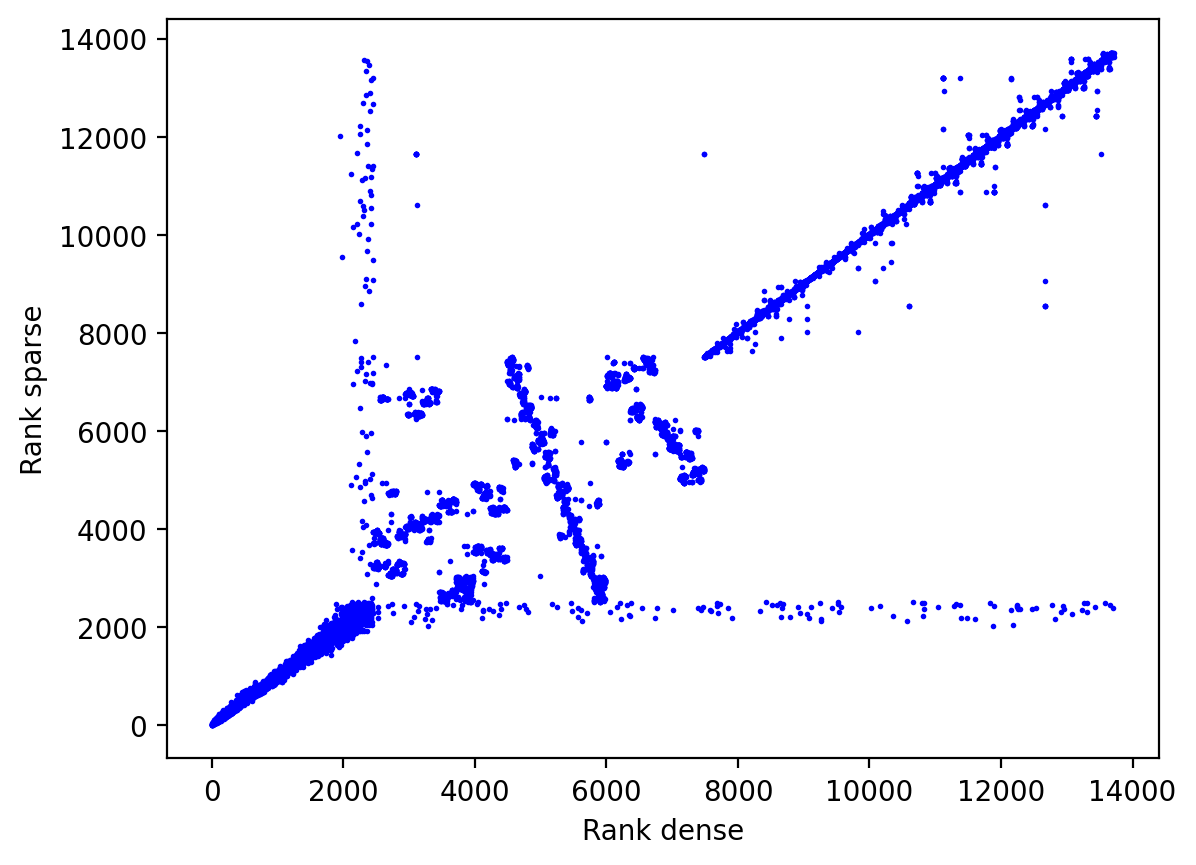

In [89]:
plt.plot(d.rank1, d.rank2, "bo", markersize=1)
plt.xlabel("Rank dense")
plt.ylabel("Rank sparse")